<a href="https://colab.research.google.com/github/avyay10/TwitterSentiment/blob/main/Predictive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
meow = pd.read_csv("articles2.csv")

meow.loc[(meow["sentiment"] < -1/10) & (meow["sentiment"] >= -1) , "sentiment"] = -1
meow.loc[(meow["sentiment"] < 1/10) & (meow["sentiment"] >= -1/10) , "sentiment"] = 0
meow.loc[(meow["sentiment"] <= 1) & (meow["sentiment"] >= 1/10) , "sentiment"] = 1

print(meow['sentiment'].unique())
print(meow['sentiment'].isin([-1]).sum())
print(meow['sentiment'].isin([0]).sum())
print(meow['sentiment'].isin([1]).sum())


[ 1.  0. -1.]
4654
22771
23143


In [ ]:
positive_df = meow[meow['sentiment'] == 1]
train_positive = positive_df[:3000]
test_positive = positive_df[3000:3750]

neutral_df = meow[meow['sentiment'] == 0]
train_neutral = neutral_df[:3000]
test_neutral = neutral_df[3000:3750]

neg_df = meow[meow['sentiment'] == -1]
train_neg = neg_df[:3000]
test_neg = neg_df[3000:3750]

In [ ]:
traindf = train_positive.append([train_neutral,train_neg])
testdf = test_positive.append([test_neutral,test_neg])

df = traindf.append(testdf, sort=False)

#print(meow['sentiment'].head(25))
y = df[["sentiment","location","date","Confirmed"]]
X = df[["tweet"]]


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
tfidfX = vectorizer.fit_transform(X["tweet"])
#print(vectorizer.get_feature_names())
print(tfidfX.shape)

X_train, X_test, y_train, y_test = train_test_split(tfidfX, y, test_size=0.2, random_state=0)

y_train_sent = y_train[["sentiment"]]
y_test_sent = y_test[["sentiment"]]

(11250, 31069)


In [ ]:
C=[1.0]
penalty=['l1']
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
for i in C:
    for j in penalty:
        clf = LogisticRegression(C = i, penalty=j, solver = 'saga', max_iter = 200).fit(X_train, y_train_sent)
        test_score = clf.score(X_test, y_test_sent)
        print(test_score)
        print(i, j)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.4106666666666667
1.0 l1


In [ ]:
test_predictions = clf.predict(X_test)
print(confusion_matrix(y_test_sent,test_predictions))  
print(classification_report(y_test_sent,test_predictions))  
print(accuracy_score(y_test_sent, test_predictions))

[[362 164 223]
 [201 280 287]
 [198 253 282]]
              precision    recall  f1-score   support

        -1.0       0.48      0.48      0.48       749
         0.0       0.40      0.36      0.38       768
         1.0       0.36      0.38      0.37       733

    accuracy                           0.41      2250
   macro avg       0.41      0.41      0.41      2250
weighted avg       0.41      0.41      0.41      2250

0.4106666666666667


datetime64[ns]


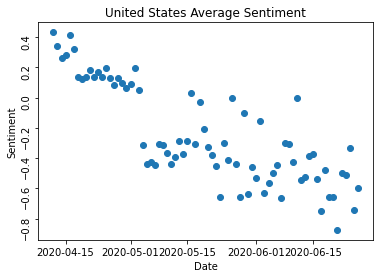

In [ ]:
import matplotlib.pyplot as plt 
import datetime
dates = y_train['date'].unique()
converted_dates = list(map(datetime.datetime.strptime, dates, len(dates)*['%Y-%m-%d']))
stateX = X_train.toarray()
#ylist = classifier_linear.predict(stateX)
#print(ylist)
from matplotlib import pyplot as plt
#_df = y_train[(y_train['location']==state)] #& (y_train['date']< '2020-04-19')]
y_df = y_train
y_df['date'] = pd.to_datetime(y_df['date'])
#print(type(y_df['date']))
print(y_df['date'].dtype)
y_df['predicted_sent'] = clf.predict(stateX)
# import IPython
# IPython.embed()
y_df = y_df.groupby('date', as_index=False).mean()
# print(type(y_df))
# plt.scatter(y_df.index,y_df['predicted_sent'])
# plt.scatter(y_df['date'],y_df['predicted_sent'])0
plt.title("United States Average Sentiment")
plt.xlabel('Date')
plt.ylabel('Sentiment')
plt.scatter(y_df['date'],list(y_df['predicted_sent']))
plt.yticks(rotation=90)
plt.show()